In [1]:
import pandas as pd # Import the pandas library and alias it as pd for convenience


In [2]:
df = pd.read_csv("reviews_data.csv") # Read the CSV file "un-general-debates-blueprint.csv" into a pandas DataFrame and store it in the variable df


In [33]:
df.head(100)# Display the first 20 rows of the DataFrame using the head() method


,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
95,Savaa,"Trenton, NJ","Reviewed Dec. 25, 2021",1.0,I got a Starbucks gift card and ordered a coff...,['No Images']
96,Izzy,"Louisville, KY","Reviewed Dec. 22, 2021",5.0,Incredible experience every time. Thankful for...,['No Images']
97,Spiros,"Allentown, PA","Reviewed Nov. 30, 2021",1.0,"Despite customer traffic being slow, I had to ...",['No Images']
98,Ayako,"Denver, CO","Reviewed Nov. 28, 2021",1.0,Corporate here in Denver Colorado HONESTLY DO ...,['https://media.consumeraffairs.com/files/cach...


In [34]:
df.columns# Retrieve and display the column names of the DataFrame using the columns attribute


Index(['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links'], dtype='object')

In [35]:
df.dtypes# Retrieve and display the data types of the columns in the DataFrame using the dtypes attribute


name             object
location         object
Date             object
Rating         category
Review           object
Image_Links      object
dtype: object

In [36]:
df.describe()


,name,location,Date,Rating,Review,Image_Links
count,850,850,850,705.0,850,850
unique,604,633,741,5.0,814,47
top,Linda,"New York, NY","Reviewed Sept. 14, 2017",1.0,No Review Text,['No Images']
freq,13,14,4,451.0,37,804


In [37]:
print(df.columns)


Index(['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links'], dtype='object')


# descriptive statistics for the DataFrame

In [38]:
df['length'] = df['Review'].str.len()# Create a new column 'length' in the DataFrame df, which calculates the length of each text entry in the 'review' column

df.describe()# Generate descriptive statistics for the DataFrame, including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for numeric columns



,length
count,850.000000
mean,471.064706
std,243.541473
min,14.000000
25%,272.000000
50%,459.500000
75%,655.250000
max,1161.000000


In [39]:
df.describe(include='O')


,name,location,Date,Review,Image_Links
count,850,850,850,850,850
unique,604,633,741,814,47
top,Linda,"New York, NY","Reviewed Sept. 14, 2017",No Review Text,['No Images']
freq,13,14,4,37,804


In [40]:
df.isna().sum()# Check for missing values

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
length           0
dtype: int64

In [13]:
# Drop rows with missing values in the 'Rating' column
df.dropna(subset=['Rating'], inplace=True)

# Filter the DataFrame based on the 'Rating' column containing 'BUSH'
filtered_df = df[df['Rating'].str.contains('BUSH')]


# ploting

<AxesSubplot:>

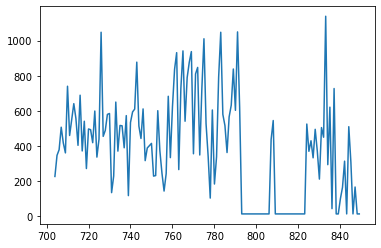

In [14]:
df['length'].plot()# generate a plot of the values in the 'length' column of the DataFrame df.


<AxesSubplot:>

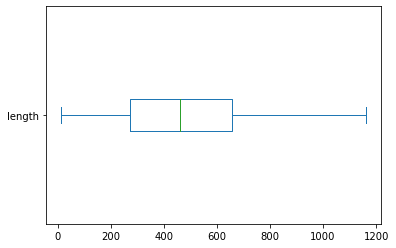

In [46]:
df['length'].plot(kind='box', vert=False)#l generate a box plot of the values in the 'length' column of the DataFrame df, where the box plot is horizontally oriented.


<AxesSubplot:ylabel='Frequency'>

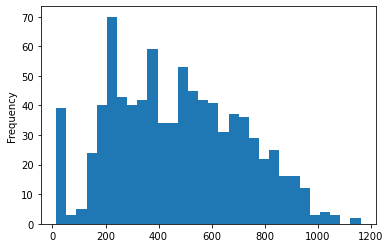

In [47]:
df['length'].plot(kind='hist', bins=30)


In [48]:
print(df.columns)



Index(['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links',
       'length'],
      dtype='object')


In [52]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [61]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [75]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
stopwords = set(nltk.corpus.stopwords.words('english'))

pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

df['tokens'] = df['Review'].apply(prepare, pipeline=pipeline)

In [76]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,name,location,Date,Rating,Review,Image_Links,tokens,num_tokens
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images'],"[ordered, two, venti, frappacino, without, whi...",26
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images'],"[review, text]",2
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images'],"[demanded, tips, made, wait, coffees, cold, me...",14
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images'],"[review, text]",2
849,Christian,"Ramsey, NJ","Reviewed July 19, 2000",NaN,No Review Text,['No Images'],"[review, text]",2


# word frequency

In [77]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('starbucks', 1055), ('coffee', 596), ('customer', 286), ('one', 279), ('get', 278)]


In [79]:
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
starbucks,1055
coffee,596
customer,286
one,279
get,278
drink,277
store,259
service,257
time,237


In [80]:
freq_df.describe()

,freq
count,5688.000000
mean,6.260900
std,23.392736
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,1055.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

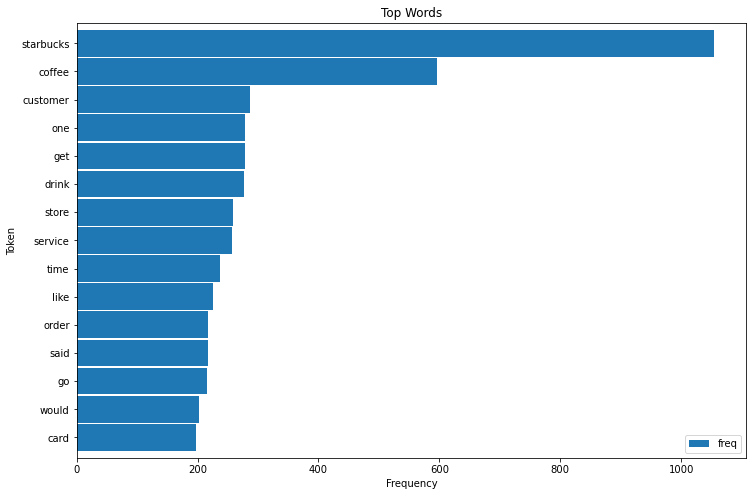

In [81]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# word cloud

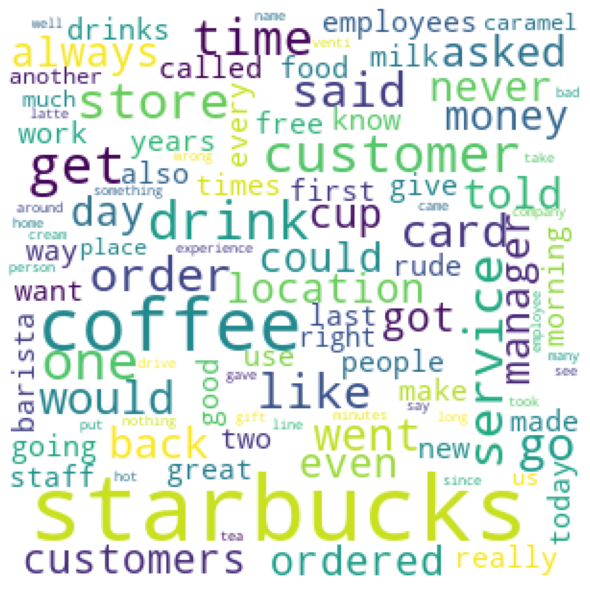

In [82]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()